In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
a = tf.Variable(1, name="a")
b = tf.Variable(2, name="b")

In [3]:
f = a + b

In [4]:
tf.print("The sum of a and b is", f)

The sum of a and b is 3


In [6]:
# Mnist dataset parameters
num_classes = 10 # (0-9 digits)
num_features = 784 # (img shape 28 * 28)

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

In [19]:
# flatten images to 1-D vector of 784 features (28*28)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features]) 

In [21]:
# Normalize images
x_train, x_test = x_train/255.0, x_test/255.0

In [38]:
# Visualize the data
import matplotlib.pyplot as plt

def display_img(num):
    label = y_train[num]
    
    # Reshape the 784 values to a 28*28 img
    img = x_train[num].reshape([28, 28])
    plt.title("Sample: {} Label: {}".format(num, label))
    plt.imshow(img, cmap=plt.get_cmap('gray_r'))
    plt.show()

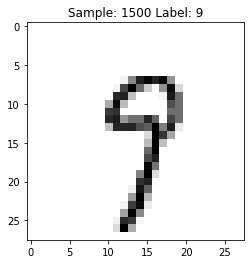

In [40]:
display_img(1500)

In [41]:
# training parameters
learning_rate = 0.001
trainin_steps = 3000
batch_size = 250
display_step = 100
n_hidden = 512

In [49]:
# Use tf.data to shuffle and batch data
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

In [54]:
# Construct

# Store layers weight and bias
random_normal = tf.initializers.RandomNormal()

weight = {
    'h': tf.Variable(random_normal([num_features, n_hidden])),
    'out': tf.Variable(random_normal([n_hidden, num_classes]))
}
biases = {
    'b': tf.Variable(tf.zeros([n_hidden])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [55]:
# Create model
def neural_net(inputData):
    # Hidden fully connected layer with 512 neurons
    hidden_layer = tf.add(tf.matmul(inputData, weights['h']), biases['b'])
    # Apply sigmoid to hidden_layer output for non-linearity
    hidden_layer = tf.nn.sigmoid(hidden_layer)
    
    # Output fully connected layer with a neuron for each class.
    out_layer = tf.matmul(hidden_layer, weights['out']) + biases['out']
    # Apply softmax to normalize the logits to a probability distribution
    return tf.nn.softmax(out_layer)

In [56]:
# Define our loss function
def cross_entropy(y_pred, y_true):
    # encode label to a one hot vector
    y_true = tf.one_hot(y_true, depth=10)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross entropy
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [73]:
# Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate)

def run_optimization(x, y):
    # Wrap computation inside a gradient tape for automatic differenciation
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
    
    # Variables to update, i.e. trainable variables
    trainable_variables = list(weight.values()) + list(biases.values())
    
    # Compute the gradient i.e. minimize loss wrt trainable weights
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [74]:
# Accuracy metric
def accuracy(y_pred, y_true):
    correc_pred = tf.equal(tf.argmax(y_pred, 1)), tf.cast(y_true, tf.int64)
    return tf.reduce_mean(tf.cast(correct_pred, tf.float32), axis=1)

In [75]:
# Training the model